<a href="https://colab.research.google.com/github/vipin0761/Data_Science/blob/main/3.%20basics%20of%20data%20science/2.%20statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Measure of Central Tendency

In [ ]:
arr = [1,5,7,6,3,4,6,9,7,5,2,1,3,6,4,5,8,7,5,2,3,4,6,9,7,4,1,2,3,6,5,4,8,5,6,3,2,3,1,4,7,8,9,9,6,8,7,4,1,2]

import numpy as np

# Mean
np.mean(arr)


4.86

In [ ]:
# Median
np.median(arr)

5.0

In [ ]:
# Mode

from scipy import stats
stats.mode(arr)

<ipython-input-3-488e506b9b93>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(arr)


ModeResult(mode=array([4]), count=array([7]))

## Measures of Dispersion

In [ ]:
# variance
np.var(arr)

5.7204

In [ ]:
# standart deviation
np.std(arr)

2.39173577135937

<Axes: ylabel='Count'>

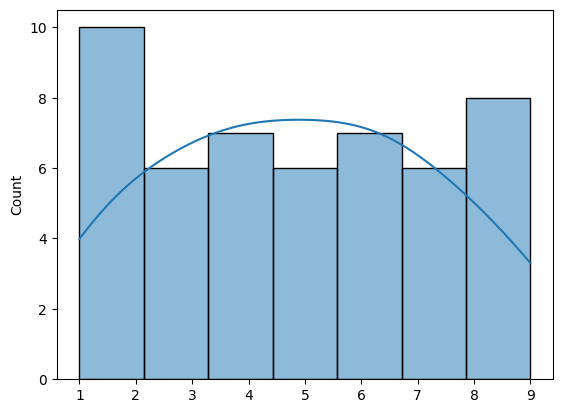

In [ ]:
import seaborn as sns
sns.histplot(arr,kde=True)

In [ ]:
#covariance

import seaborn as sns

df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [ ]:
# covariance using data Frame
df.cov()


<ipython-input-2-beb0d57abcce>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [ ]:
# pearson correlation coefficient
df.corr(method='pearson')

<ipython-input-3-350c26e74433>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [ ]:
# spearman rank correlation
df.corr(method='spearman')

<ipython-input-4-2f07f5e5c548>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [1]:
# Eliminating Outliers

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import statistics as st

In [9]:
data = [1,5,7,6,3,4,6,9,7,5,2,1,3,6,4,5,8,7,5,2,3,4,6,9,7,4,1,2,3,6,5,4,8,5,6,3,2,3,1,4,7,8,9,9,6,8,7,4,1,2,12,15]
outliers = []

def detect_outliers(data):
    threshold = 3 # anything beyond 3rd standard deviation is considered an outlier
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers
outliers = detect_outliers(data)
outliers

[15]

In [12]:
''' Inter-quartile range (IQR)
  1. sort the data
  2. calculate Q1 and Q3
  3. calculate IQR = Q3 - Q1
  4. find the lower fence (q1 - 1.5*iqr)
  5. find the upper fence (q3 + 1.5*iqr)
'''
def detect_outliers2(data):
  dataset = sorted(data)
  q1,q3 = np.percentile(dataset,[25,75])
  iqr = q3-q1
  lower_fence = q1 - (1.5*iqr)
  upper_fence = q3 + (1.5*iqr)
  outliers = []

  for i in data :
    if i < lower_fence or i > upper_fence:
      outliers.append(i)
  return outliers
outliers = detect_outliers2(data)
outliers



[15]

Z - Test

Suppose the IQ in a certain population is normally distributed with a mean of u = 100and a standard deviation of 15.










a researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels.

The following code shows how to perform a one sample z-test in Python to determine if the new drug causes a significant difference in IQ levels:

In [1]:
from statsmodels.stats.weightstats import ztest as ztest

# enter IQ levels of 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

# perform one sample z-test
z_statistic, p_value = ztest(data, value=100)
z_statistic, p_value

(1.5976240527147705, 0.1101266701438426)

In [3]:
# perform one sample t-test
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
import numpy as np
ages_mean = np.mean(ages)
ages_mean


30.34375

In [4]:
sample_sizr = 10
age_sample = np.random.choice(ages,sample_sizr)
age_sample

array([19, 24, 18, 50, 40, 17, 30, 24, 70, 21])

In [5]:
from scipy.stats import ttest_1samp
t_stat,p_value = ttest_1samp(age_sample,30)
t_stat,p_value

(0.2386716544664315, 0.8167060368661746)